In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df_original = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2020_20250409.csv')

/var/folders/0b/bd08tdvx0zq93j7tbbzdnmt00000gn/T/ipykernel_1892/3032862847.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2020_20250409.csv')


In [ ]:
df_original.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,50 to 69,104,F,Black/African American,Not Span/Hispanic,...,Moderate,Moderate,Medical,Medicare,NaN,NaN,NaN,Y,214778.30,40532.42
1,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Black/African American,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,N,33385.21,8996.74
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,50 to 69,104,F,Other Race,Spanish/Hispanic,...,Moderate,Major,Medical,Medicare,Medicaid,NaN,NaN,Y,16581.52,1735.53
3,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,0 to 17,104,M,Other Race,Spanish/Hispanic,...,Moderate,Moderate,Medical,Medicaid,NaN,NaN,NaN,N,14086.86,3438.63
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,0 to 17,104,M,Other Race,Spanish/Hispanic,...,Moderate,Minor,Medical,Blue Cross/Blue Shield,NaN,NaN,NaN,Y,28222.99,6886.04


In [ ]:
df_original.shape

(2052408, 33)

In [ ]:
df_original.columns

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

## Find data for mental illness related admissions

In [ ]:
[item for item in df_original['APR MDC Description'].unique().tolist() if isinstance(item, str) and 'MENTAL' in item]

['ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS',
 'MENTAL DISEASES AND DISORDERS']

In [ ]:
# df = df_original[df_original['APR MDC Description'].str.contains('MENTAL')]
df= df_original

In [ ]:
df.shape

(2052408, 33)

In [ ]:
def mental_indicator(data):
    if isinstance(data, str) and 'MENTAL' in data:
        return 1
    else:
        return 0

In [ ]:
df['mental_indicator'] = df['APR MDC Description'].apply(mental_indicator)

In [ ]:
df.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs,mental_indicator
0,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,50 to 69,104,F,Black/African American,Not Span/Hispanic,...,Moderate,Medical,Medicare,NaN,NaN,NaN,Y,214778.30,40532.42,0
1,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Black/African American,Not Span/Hispanic,...,Minor,Medical,Medicaid,NaN,NaN,NaN,N,33385.21,8996.74,0
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,50 to 69,104,F,Other Race,Spanish/Hispanic,...,Major,Medical,Medicare,Medicaid,NaN,NaN,Y,16581.52,1735.53,0
3,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,0 to 17,104,M,Other Race,Spanish/Hispanic,...,Moderate,Medical,Medicaid,NaN,NaN,NaN,N,14086.86,3438.63,0
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,0 to 17,104,M,Other Race,Spanish/Hispanic,...,Minor,Medical,Blue Cross/Blue Shield,NaN,NaN,NaN,Y,28222.99,6886.04,0


# Data Analysis

## How people afford health care

<Axes: xlabel='percent', ylabel='Payment Typology 1'>

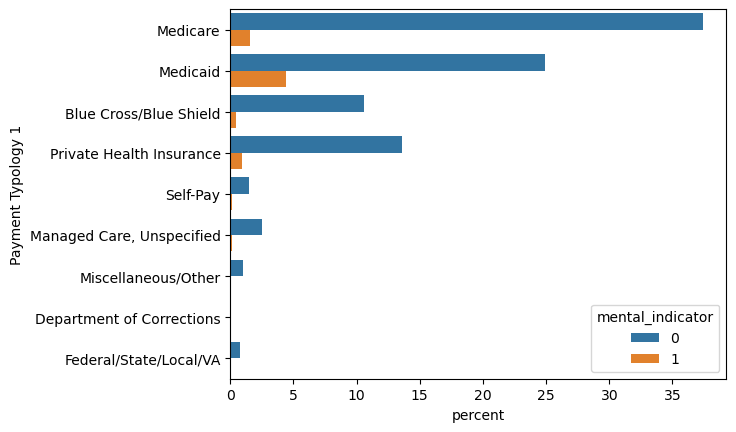

In [ ]:
sns.countplot(df, y="Payment Typology 1", stat='percent', hue='mental_indicator')

## Sevearity of the Illness

In [ ]:
df['APR Severity of Illness Description'].unique()

array(['Moderate', 'Major', 'Minor', 'Extreme', nan], dtype=object)

In [ ]:
df['APR Severity of Illness Description'] = pd.Categorical(df['APR Severity of Illness Description'], ['Minor','Moderate','Major','Extreme'])

<Axes: xlabel='Percent', ylabel='APR Severity of Illness Description'>

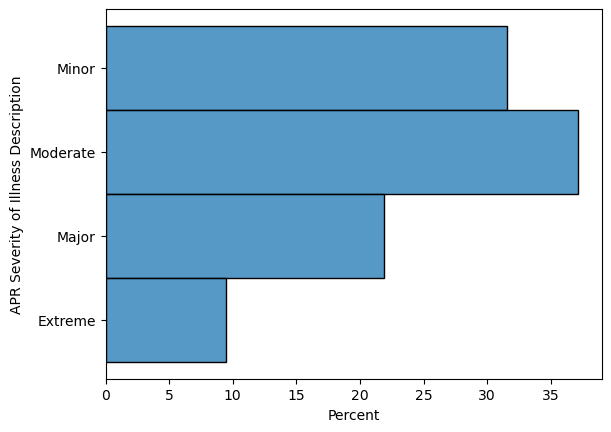

In [ ]:
sns.histplot(df, y="APR Severity of Illness Description", stat='percent')

## Admission by Zipcode

<Axes: xlabel='Count', ylabel='Zip Code - 3 digits'>

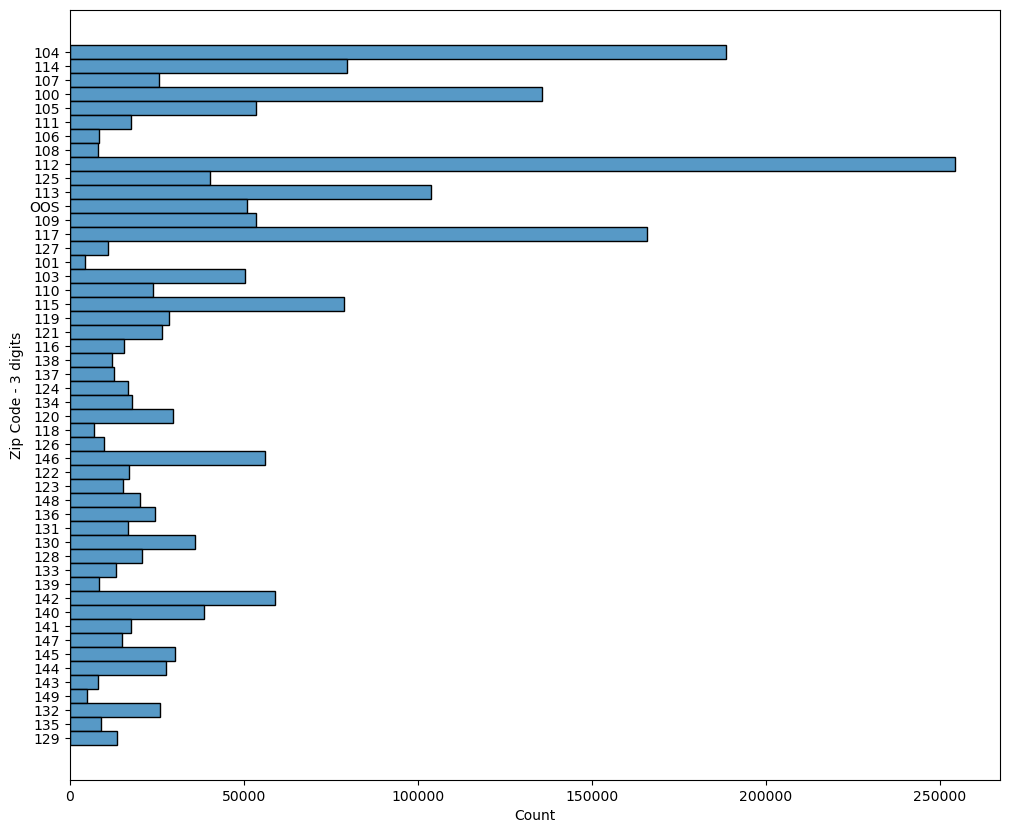

In [ ]:
plt.figure(figsize=(12,10))
sns.histplot(df, y="Zip Code - 3 digits")

## Process Age data

In [ ]:
df['Age Group'].unique()

array(['50 to 69', '18 to 29', '0 to 17', '70 or Older', '30 to 49'],
      dtype=object)

In [ ]:
def process_age(age_string):
    if (age_string == '0 to 17'):
        return 1
    elif(age_string == '18 to 29'):
        return 2
    elif(age_string == '30 to 49'):
        return 3
    elif(age_string == '50 to 69'):
        return 4
    elif(age_string == '70 or Older'):
        return 5



In [ ]:
df['age'] = df['Age Group'].apply(process_age)

In [ ]:
df.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs,mental_indicator,age
0,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,50 to 69,104,F,Black/African American,Not Span/Hispanic,...,Medical,Medicare,NaN,NaN,NaN,Y,214778.30,40532.42,0,4
1,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Black/African American,Not Span/Hispanic,...,Medical,Medicaid,NaN,NaN,NaN,N,33385.21,8996.74,0,2
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,50 to 69,104,F,Other Race,Spanish/Hispanic,...,Medical,Medicare,Medicaid,NaN,NaN,Y,16581.52,1735.53,0,4
3,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,0 to 17,104,M,Other Race,Spanish/Hispanic,...,Medical,Medicaid,NaN,NaN,NaN,N,14086.86,3438.63,0,1
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,0 to 17,104,M,Other Race,Spanish/Hispanic,...,Medical,Blue Cross/Blue Shield,NaN,NaN,NaN,Y,28222.99,6886.04,0,1


<Axes: title={'center': 'Age vs Gender'}, xlabel='percent', ylabel='age'>

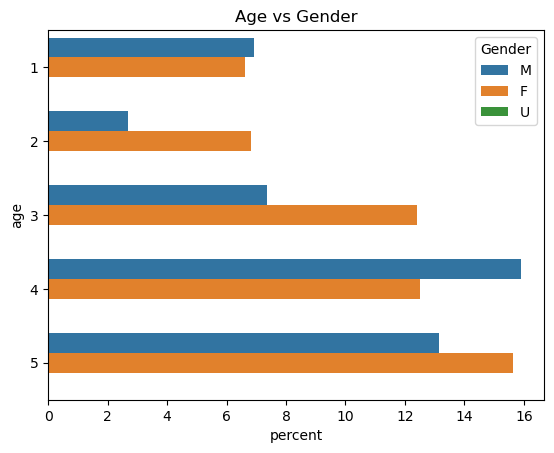

In [ ]:
plt.title('Age with Gender')
sns.countplot(df, y="age", stat='percent', hue='Gender')

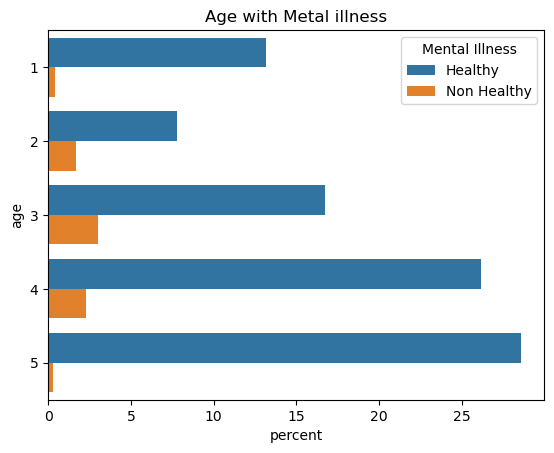

In [ ]:
plt.title('Age with Metal illness')
sns.countplot(df, y="age", stat='percent', hue='mental_indicator',  legend=False)
plt.legend(title='Mental Illness', loc='upper right', labels=['Healthy', 'Non Healthy'])
# plt.show(g)

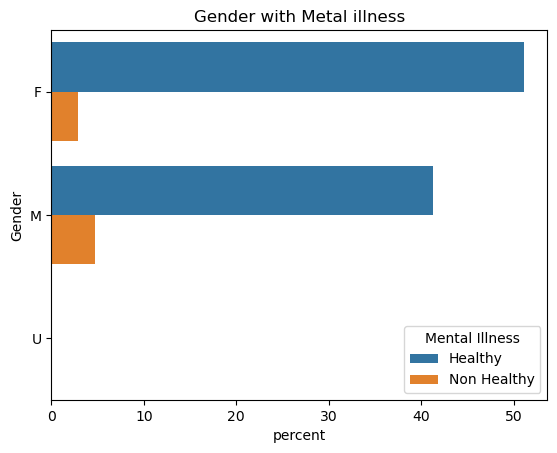

In [ ]:
plt.title('Gender with Metal illness')
sns.countplot(df, y="Gender", stat='percent', hue='mental_indicator',  legend=False)
plt.legend(title='Mental Illness', loc='lower right', labels=['Healthy', 'Non Healthy'])